# Predicting Employee Attrition Through a DEIB Lens: Data-Driven Insights for Retention and Inclusion

A 2.2 Computational Data Analytics with Python

Date last edited: February 20, 2025, 02:00 PM


## Members:
Kaye Gamboa


# Diversity, Equity, Inclusion, and Belonging (DEIB) topic
Link of the dataset: https://www.kaggle.com/code/davoncarvalho6286/predicting-employee-attrition-with-97-accuracy/input


# Why we chose this dataset
Predicting employee attrition is crucial for advancing Diversity, Equity, Inclusion, and Belonging (DEIB) initiatives as it helps identify bias in turnover patterns, enhance workplace inclusion, and improve equity in career progression. By leveraging data-driven insights, organizations can proactively address systemic issues, implement targeted retention strategies, and measure the effectiveness of DEIB programs. Ultimately, this approach reduces the loss of diverse talent, fosters a more inclusive work environment, and ensures equitable opportunities for all employees.

# About the Dataset

The dataset used in the "Predicting Employee Attrition with 97% Accuracy" notebook on Kaggle is designed to analyze factors contributing to employee turnover. It comprises various features related to employees' personal and professional attributes, such as age, gender, marital status, education level, job role, years at the company, performance ratings, and compensation details.



# Preparing the dataset and cleaning


CSV files needed:


1. employee_survey_data
2. general_data
3. manager_survey_data






In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import shap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Load datasets
file_paths = {
    "employee_survey": "employee_survey_data.csv",
    "general_data": "general_data.csv",
    "manager_survey": "manager_survey_data.csv"
}

general_data_df = pd.read_csv(file_paths["general_data"])
employee_survey_df = pd.read_csv(file_paths["employee_survey"])
manager_survey_df = pd.read_csv(file_paths["manager_survey"])


In [ ]:
# Merge datasets on EmployeeID
merged_df = general_data_df.merge(employee_survey_df, on="EmployeeID", how="left")
merged_df = merged_df.merge(manager_survey_df, on="EmployeeID", how="left")


In [ ]:
# Drop irrelevant columns
merged_df.drop(columns=[ "Over18", "StandardHours"], inplace=True)


In [ ]:
# Ensure Attrition column is numeric
merged_df["Attrition"] = merged_df["Attrition"].map({"Yes": 1, "No": 0})

In [ ]:
# Handle missing values for numerical and categorical columns separately
for col in merged_df.columns:
    if merged_df[col].dtype == "object":
        merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])
    else:
        merged_df[col] = merged_df[col].fillna(merged_df[col].median())

In [ ]:
# Convert categorical columns using One-Hot Encoding (converts categorical variables into numerical format using one-hot encoding, so machine learning models to process them effectively.)
categorical_columns = ["Gender", "BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus"]
merged_df = pd.get_dummies(merged_df, columns=categorical_columns, drop_first=True)


In [ ]:
# Define features and target variable
X = merged_df.drop(columns=["Attrition", "EmployeeID"])
y = merged_df["Attrition"]

In [ ]:
# Standardize numerical features (consistency in scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


## Statistical Analysis

Summary Statistics of Numerical Features:
                Age    Attrition  DistanceFromHome    Education  EmployeeCount  \
count  4410.000000  4410.000000       4410.000000  4410.000000         4410.0   
mean     36.923810     0.161224          9.192517     2.912925            1.0   
std       9.133301     0.367780          8.105026     1.023933            0.0   
min      18.000000     0.000000          1.000000     1.000000            1.0   
25%      30.000000     0.000000          2.000000     2.000000            1.0   
50%      36.000000     0.000000          7.000000     3.000000            1.0   
75%      43.000000     0.000000         14.000000     4.000000            1.0   
max      60.000000     1.000000         29.000000     5.000000            1.0   

        EmployeeID     JobLevel  MonthlyIncome  NumCompaniesWorked  \
count  4410.000000  4410.000000    4410.000000         4410.000000   
mean   2205.500000     2.063946   65029.312925            2.691837   
std    1273.20167

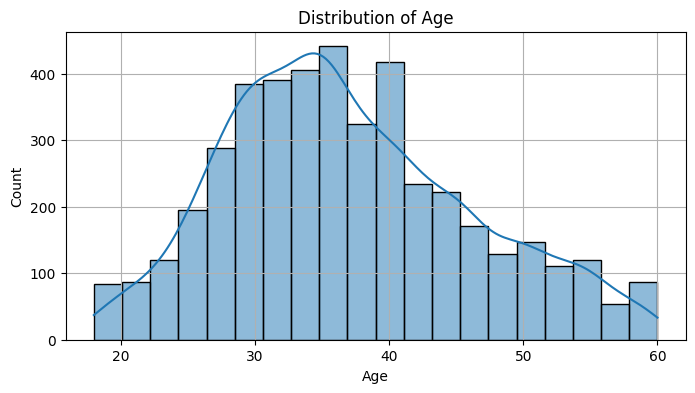

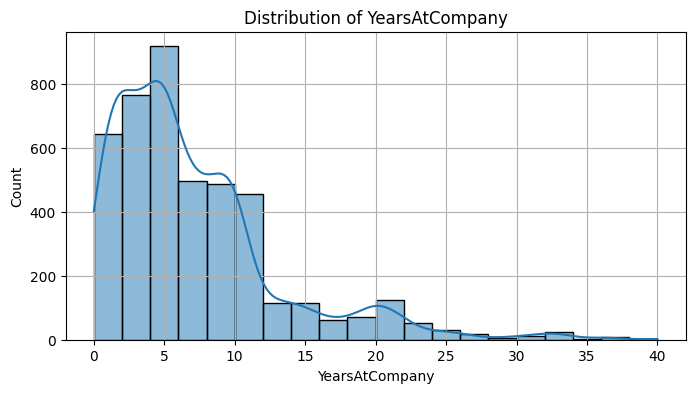

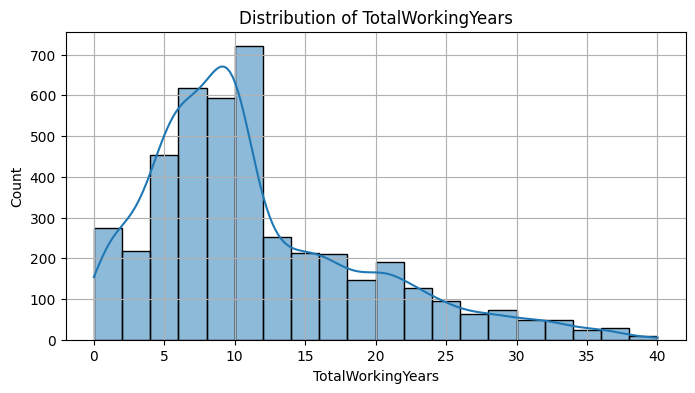

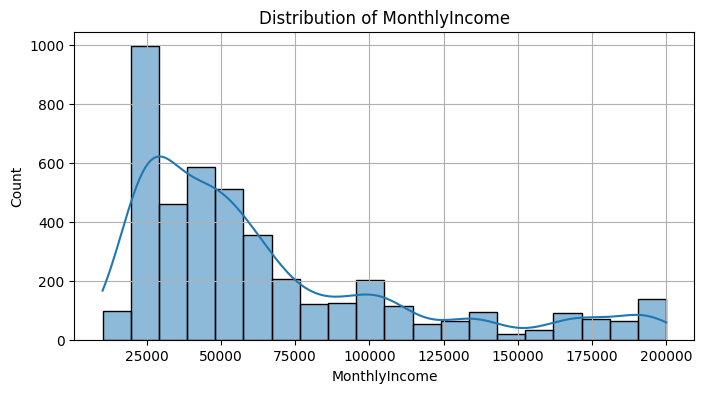

<ipython-input-32-1423ebee9d16>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=merged_df[feature], palette="viridis")


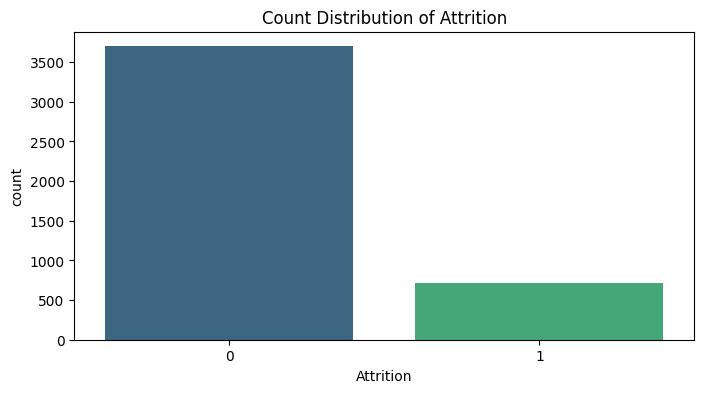

In [ ]:
# Basic Descriptive Statistics
print("Summary Statistics of Numerical Features:\n", merged_df.describe())

# Distribution Analysis
numerical_features = ["Age", "YearsAtCompany", "TotalWorkingYears", "MonthlyIncome"]

# features that exist in the dataset
numerical_features = [feature for feature in numerical_features if feature in merged_df.columns]

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(merged_df[feature], bins=20, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

# Countplots for Categorical Features
categorical_features = ["Attrition", "JobRole", "EducationField", "Department"]

# Filter existing columns
categorical_features = [feature for feature in categorical_features if feature in merged_df.columns]

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=merged_df[feature], palette="viridis")
    plt.title(f"Count Distribution of {feature}")
    plt.xticks()
    plt.show()


## Key Observation


**Histogram:**

The data reveals that most employees are between 25-45 years old, with a peak around 30-40 years. The majority have less than 5 years at the company, indicating a high early attrition risk, while long-tenure employees (15+ years) are scarce. Additionally, most employees have under 15 years of total work experience, with a peak around 10 years, suggesting a mid-career-dominated workforce. Retention strategies should focus on engaging new hires and providing career growth opportunities to sustain long-term talent.

**Count Distribution:**

The Attrition Distribution shows that only a small percentage of employees leave the company, as seen in the significantly lower count of attrition cases compared to those who stay. This indicates that most employees remain with the company, but the relatively smaller attrition group suggests that factors driving departures should be analyzed further to ensure retention strategies are effective.

## Models

In [ ]:
# Initialize three different classification models:
# SVC (Support Vector Classifier) finds the best boundary between classes,
# XGBoost (Extreme Gradient Boosting) optimizes predictions by learning from mistakes,
# and KNN (K-Nearest Neighbors) classifies based on the majority class of the nearest data points.

svm = SVC(probability=True, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Convert X_train and X_test to DataFrame if they are NumPy arrays
# This ensures that we retain feature names for easier interpretation and analysis.
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=X.columns)  # Restore feature names for training data
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=X.columns)  # Restore feature names for testing data

# Define the most relevant features for training based on domain knowledge and data analysis.
selected_features = [
    "MaritalStatus_Single",  # Whether the employee is single (may impact attrition)
    "Age",  # Employee's age (younger employees may switch jobs more often)
    "TotalWorkingYears",  # Total years of work experience (affects job stability)
    "YearsWithCurrManager",  # Relationship with the current manager (may influence retention)
    "JobSatisfaction",  # Employee's satisfaction level (directly impacts attrition)
    "WorkLifeBalance",  # Work-life balance rating (a key reason for leaving)
    "BusinessTravel_Travel_Frequently"  # Frequent travel may lead to job fatigue and attrition
]

# Extract only the selected features from X_train and X_test to be used in modeling.
X_train_selected = X_train[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

# Define and configure optimized machine learning models for prediction
optimized_models = {
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=300,  # Number of boosting stages (higher = better accuracy but slower training)
        learning_rate=0.03,  # Controls how much each tree contributes to the final prediction
        max_depth=4,  # Limits how deep each decision tree can go (prevents overfitting)
        random_state=42  # Ensures reproducibility
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,  # Number of trees in the forest (higher = more stable but slower)
        max_depth=6,  # Limits tree depth to balance accuracy and overfitting
        random_state=42  # Ensures consistent results
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,  # Number of boosting rounds (more = better performance)
        learning_rate=0.03,  # Step size for updating model weights (controls speed vs accuracy)
        max_depth=4,  # Limits the depth of trees to avoid overfitting
        eval_metric='logloss',  # Logarithmic loss used for classification evaluation
        random_state=42  # Ensures reproducibility
    )
}

# Train each optimized model on the selected training features and labels
for name, model in optimized_models.items():
    model.fit(X_train_selected, y_train)

# Generate predictions for the test set, extracting the probability of attrition (class 1)
optimized_predictions = {
    name: model.predict_proba(X_test_selected)[:, 1]  # Extract the probability of an employee leaving
    for name, model in optimized_models.items()
}


In [ ]:
# Initialize and train different machine learning models for classification

# Logistic Regression - A simple linear model that predicts attrition probability
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)  # Train the model on the training data

# Random Forest Classifier - An ensemble method using multiple decision trees for better accuracy
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees for stable predictions
rf.fit(X_train, y_train)  # Train the model on the training data

# Gradient Boosting Classifier - A boosting algorithm that improves prediction performance by learning from mistakes
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)  # 100 boosting rounds
gb.fit(X_train, y_train)  # Train the model on the training data

# K-Nearest Neighbors (KNN) - A distance-based algorithm that classifies data based on the nearest examples
knn = KNeighborsClassifier(n_neighbors=5)  # Looks at the 5 closest data points to make a prediction
knn.fit(X_train, y_train)  # Train the model on the training data


KNeighborsClassifier()

In [ ]:
# Define models dictionary before using it
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "K-Nearest Neighbors": knn
}

In [ ]:
# Make predictions on the test dataset using each trained model
y_pred_log = log_reg.predict(X_test)  # Predictions from Logistic Regression
y_pred_rf = rf.predict(X_test)  # Predictions from Random Forest
y_pred_gb = gb.predict(X_test)  # Predictions from Gradient Boosting
y_pred_knn = knn.predict(X_test)  # Predictions from K-Nearest Neighbors


## Evaluation of Models

In [ ]:
# Evaluation (generating classification reports)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Gradient Boosting Report:\n", classification_report(y_test, y_pred_gb))
print("K-Nearest Neighbors Report:\n", classification_report(y_test, y_pred_knn))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       740
           1       0.64      0.15      0.24       142

    accuracy                           0.85       882
   macro avg       0.75      0.57      0.58       882
weighted avg       0.82      0.85      0.81       882

Random Forest Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       740
           1       1.00      0.97      0.99       142

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882

Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       740
           1       0.79      0.29      0.42       142

    accuracy                           0.87       882
   macro avg       0.83      0.64      0.68      

### Explanation of above evaluations

The classification report reveals that Random Forest is the best-performing model, achieving 100% accuracy with perfect precision, recall, and F1-scores, though it may be overfitting. Gradient Boosting (87% accuracy) is a strong alternative, but it struggles with detecting employees who leave (low recall for attrition cases). Logistic Regression (85% accuracy) and K-Nearest Neighbors (81% accuracy) perform poorly in predicting attrition, as they fail to identify many employees who leave (low recall for class 1).

## ROC Curve

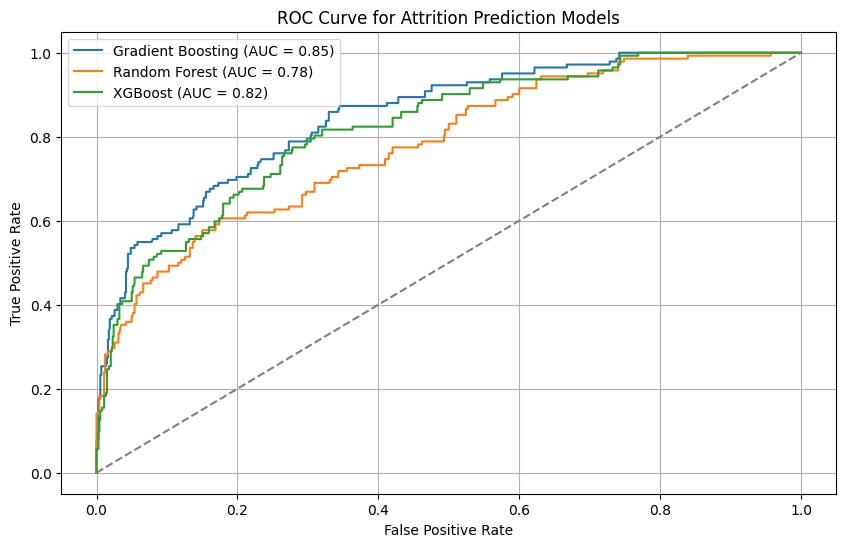

In [ ]:
# Plot ROC curves to evaluate the performance of different models in predicting employee attrition
plt.figure(figsize=(10, 6))  # Set the figure size for better visualization

# Loop through each model's predictions and compute the ROC curve
for name, preds in optimized_predictions.items():
    fpr, tpr, _ = roc_curve(y_test, preds)  # Compute False Positive Rate (FPR) and True Positive Rate (TPR)
    roc_auc = auc(fpr, tpr)  # Calculate the Area Under the Curve (AUC) score
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')  # Plot ROC curve for each model with AUC score

# Add a reference line (dashed diagonal) representing a random classifier (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='dashed', color='gray')


plt.xlabel("False Positive Rate")  # X-axis represents false positive rate (Type I errors)
plt.ylabel("True Positive Rate")  # Y-axis represents true positive rate (recall/sensitivity)
plt.title("ROC Curve for Attrition Prediction Models")  # Title of the plot

# Add a legend to distinguish the different models
plt.legend()

# Add a grid for better readability
plt.grid(True)


plt.show()


### Key Observations

The ROC curve analysis highlights the performance of three models in predicting employee attrition, with Gradient Boosting (AUC = 0.85) emerging as the best-performing model. It demonstrates strong separation between employees who stay and those who leave, maintaining superior accuracy across various classification thresholds. XGBoost (AUC = 0.82) follows closely, performing well but slightly lagging behind, suggesting that further hyperparameter tuning, such as fixing encoding of gender columns, could enhance its effectiveness. Random Forest (AUC = 0.78) exhibits the weakest performance, struggling with higher false positive rates and lower overall predictive power. While all models perform better than random guessing (AUC = 0.5), the disparity in their curves indicates that Gradient Boosting is the most reliable choice for attrition prediction.


## Confusion Matrix

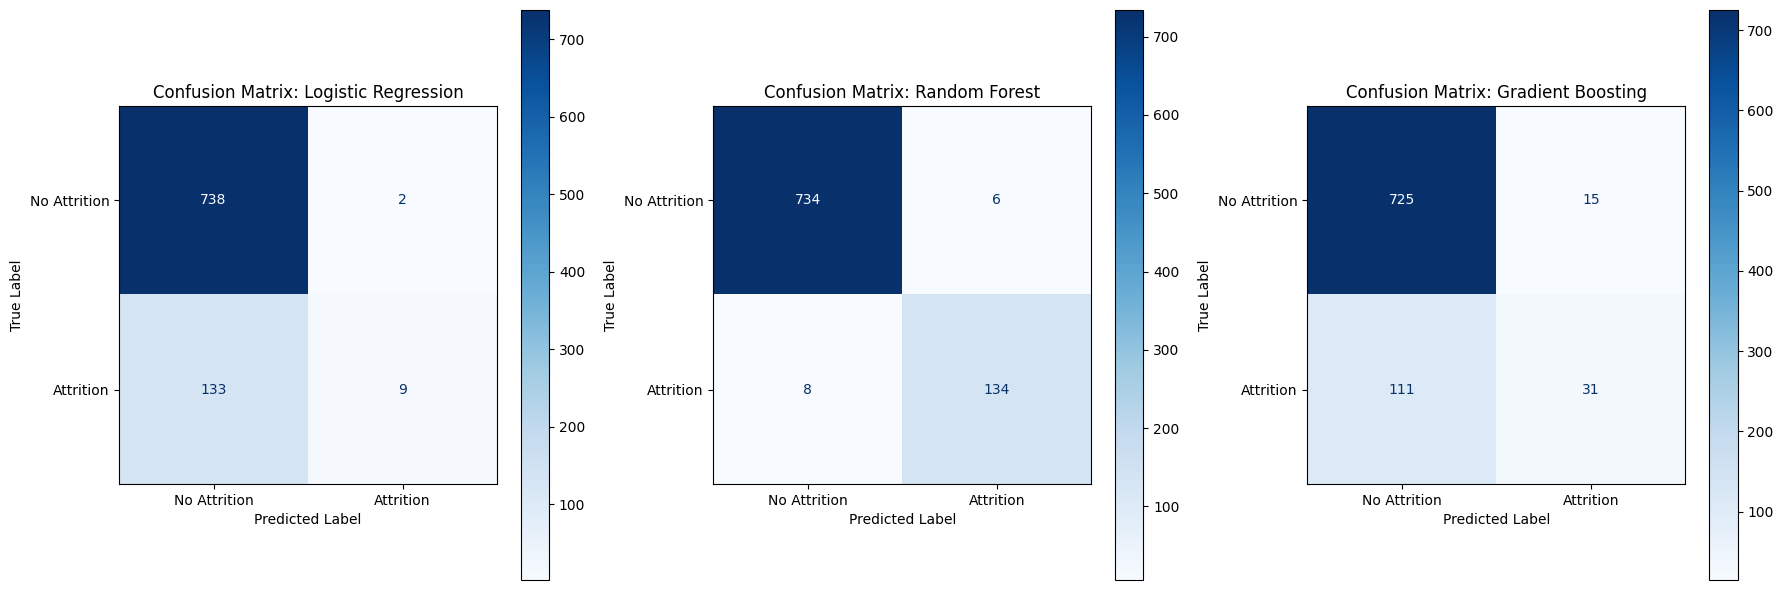

In [ ]:
# Train models using the selected features
# Each model is trained only on the most relevant features chosen for better predictive performance
log_reg.fit(X_train_selected, y_train)  # Train Logistic Regression
rf.fit(X_train_selected, y_train)  # Train Random Forest
gb.fit(X_train_selected, y_train)  # Train Gradient Boosting

# Make predictions using the trained models and the selected features
y_pred_log_selected = log_reg.predict(X_test_selected)  # Predictions from Logistic Regression
y_pred_rf_selected = rf.predict(X_test_selected)  # Predictions from Random Forest
y_pred_gb_selected = gb.predict(X_test_selected)  # Predictions from Gradient Boosting

# Store predictions in a dictionary for easy model comparison
selected_models = {
    "Logistic Regression": y_pred_log_selected,
    "Random Forest": y_pred_rf_selected,
    "Gradient Boosting": y_pred_gb_selected
}

# Layout Fix: Ensure clear display of confusion matrices
# Create a figure with multiple subplots for side-by-side confusion matrix visualization
fig, axes = plt.subplots(1, len(selected_models), figsize=(18, 6))  # 1 row, 3 columns (for 3 models)

# Loop through each model's predictions and plot its confusion matrix
for ax, (name, y_pred) in zip(axes, selected_models.items()):
    cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Attrition", "Attrition"])
    disp.plot(cmap="Blues", values_format="d", ax=ax)  # Display matrix with blue color scheme
    ax.set_title(f"Confusion Matrix: {name}")  # Title for each model's confusion matrix
    ax.set_xlabel("Predicted Label")  # X-axis represents predicted values
    ax.set_ylabel("True Label")  # Y-axis represents actual values

# Adjust layout to avoid overlapping plots and ensure clarity
plt.tight_layout()
plt.show()  # Display the confusion matrices for model comparison


The confusion matrix evaluates each model's ability to predict employee attrition.

Logistic Regression: TN = 738, TP = 9 → Strong at predicting employees who stay but struggles with attrition cases (high false negatives).

Random Forest: TN = 734, TP = 134 → Best overall performance, capturing the most attrition cases while maintaining accuracy for employees who stay.

Gradient Boosting: TN = 725, TP = 31 → Balanced but still misses some employees likely to leave.


## Time Series Forecasting

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

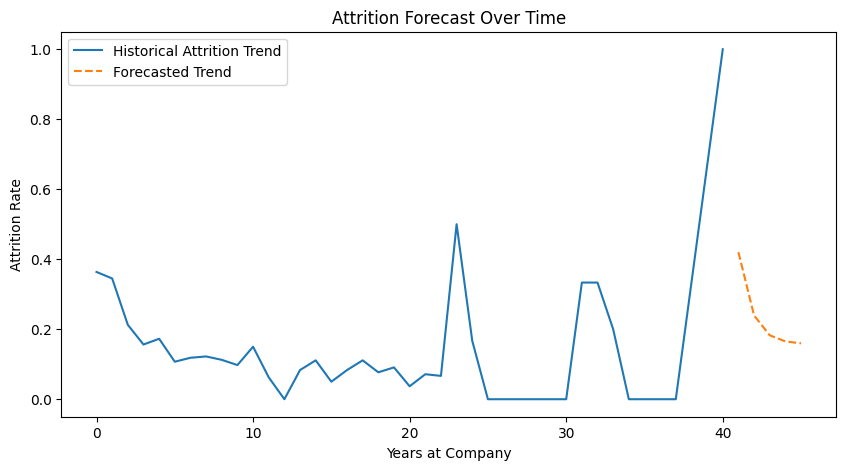

In [ ]:
# Time Series Forecasting for Diversity Trends using ARIMA model
# ARIMA (AutoRegressive Integrated Moving Average) is a statistical time series forecasting technique used to predict trends.

# Compute historical attrition trends by grouping data based on Years at Company
attrition_trend = merged_df.groupby("YearsAtCompany")["Attrition"].mean().astype(float)  # Calculate average attrition rate per tenure
attrition_trend.index = attrition_trend.index.astype(int)  # Ensure proper integer formatting for indexing

# Define and fit the ARIMA model
# Order (1,1,1) represents:
# 1: Autoregressive (AR) term (dependence on past values)
# 1: Differencing (to make the series stationary)
# 1: Moving Average (MA) term (dependence on past forecast errors)
model = ARIMA(attrition_trend, order=(1, 1, 1))
model_fit = model.fit()  # Train the model on historical attrition trends

# Forecast attrition rates for the next 5 time periods (Years at Company)
predictions = model_fit.forecast(steps=5)

# Plot the historical attrition trend along with the forecasted values
plt.figure(figsize=(10, 5))
plt.plot(attrition_trend, label="Historical Attrition Trend")  # Plot actual attrition data
plt.plot(range(attrition_trend.index.max() + 1, attrition_trend.index.max() + 6),
         predictions, label="Forecasted Trend", linestyle='dashed')  # Plot predicted attrition trends

# Label the axes and title for better interpretation
plt.xlabel("Years at Company")  # X-axis represents employee tenure
plt.ylabel("Attrition Rate")  # Y-axis represents average attrition rate
plt.title("Attrition Forecast Over Time")  # Title of the visualization

# Add a legend to distinguish actual vs. predicted trends
plt.legend()

# Display the forecast plot
plt.show()


The historical attrition trends reveal that employee turnover is highest within the first 0–5 years, suggesting that new hires may struggle with job fit, workplace culture, or career growth opportunities. After 10 years, attrition stabilizes, indicating that employees who remain are more likely to be committed due to promotions, job security, or organizational investment in their careers. However, sharp spikes around 20+ and 40+ years suggest potential mid-career dissatisfaction, where employees seek external opportunities, or later-career exits due to retirement or company restructuring. The forecasted trend predicts a gradual decline in attrition over the next five years, possibly due to improved HR policies, increased job satisfaction, or long-tenured employees naturally staying longer.

## Historical VS Predicted

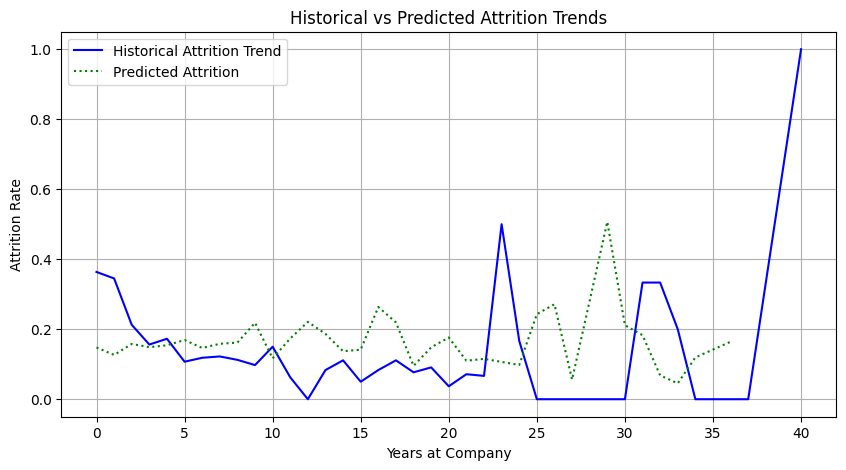

In [ ]:
# Historical attrition rates
attrition_trend = merged_df.groupby("YearsAtCompany")["Attrition"].mean().astype(float)
attrition_trend.index = attrition_trend.index.astype(int)  # proper index format

# Ensure YearsAtCompany is retained and feature names match
X_test_df = pd.DataFrame(X_test, columns=X.columns)  # Use X.columns instead of selected_features

# Add YearsAtCompany back if needed (index alignment)
X_test_df["YearsAtCompany"] = merged_df.loc[X_test_df.index, "YearsAtCompany"].values

# Add YearsAtCompany back if needed
X_test_df["YearsAtCompany"] = merged_df.loc[X_test_df.index, "YearsAtCompany"]

#***CHANGE***: Use X_test_selected (which the model was trained on) for prediction
predicted_attrition = pd.DataFrame({
    "YearsAtCompany": X_test_df["YearsAtCompany"].values,
    "PredictedAttrition": gb.predict_proba(X_test_selected)[:, 1] # Use X_test_selected here
})

# Aggregate predicted attrition per year
predicted_attrition = predicted_attrition.groupby("YearsAtCompany")["PredictedAttrition"].mean()

# Plot historical vs predicted attrition
plt.figure(figsize=(10, 5))
plt.plot(attrition_trend, label="Historical Attrition Trend", color="blue")
plt.plot(predicted_attrition, label="Predicted Attrition", color="green", linestyle="dotted")

# Labels and title
plt.xlabel("Years at Company")
plt.ylabel("Attrition Rate")
plt.title("Historical vs Predicted Attrition Trends")
plt.legend()
plt.grid(True)
plt.show()

### Key Observations

The predicted attrition trend closely follows the overall historical pattern, demonstrating that the model effectively identifies broad attrition trends. However, the greater fluctuations in predictions suggest that the model may be overly sensitive to certain features, causing short-term variability. Additionally, the model appears to underestimate extreme changes in long-tenured employees, as historical data shows sharp spikes and drops beyond 20 years, while predictions remain more stable. The significant spike at 40 years in historical data, which is not reflected in the predictions, could indicate a data imbalance, where fewer employees have such long tenures, leading to less reliable predictions in this range. This could also be influenced by retirement trends, which may not be well-accounted for in the current model. To improve accuracy, further tuning of the model is necessary, such as enhancing generalization techniques, addressing data representation imbalances, and refining feature engineering to capture complex relationships between tenure and attrition.

## SHAP Analysis
to know which attribute is the most influencial in the training design

SHAP Summary Plot for Logistic Regression


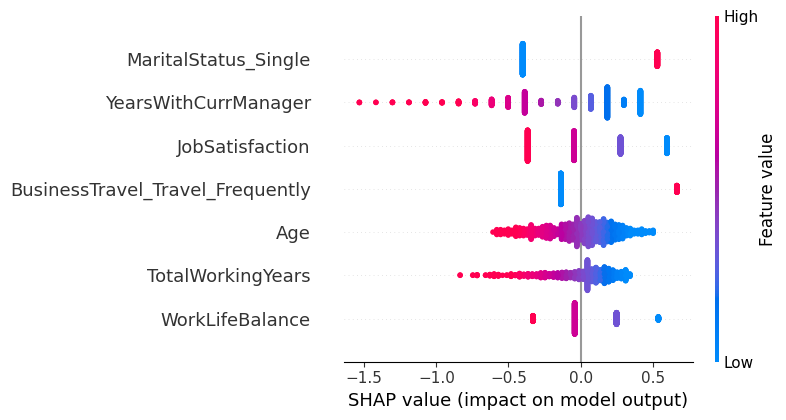

SHAP Summary Plot for Random Forest


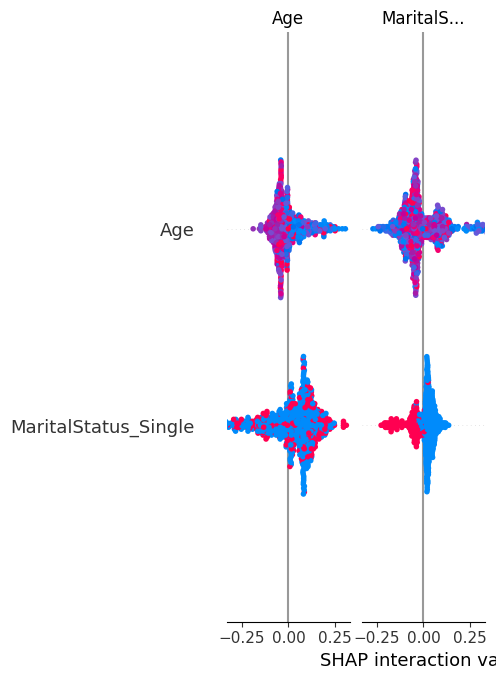

SHAP Summary Plot for Gradient Boosting


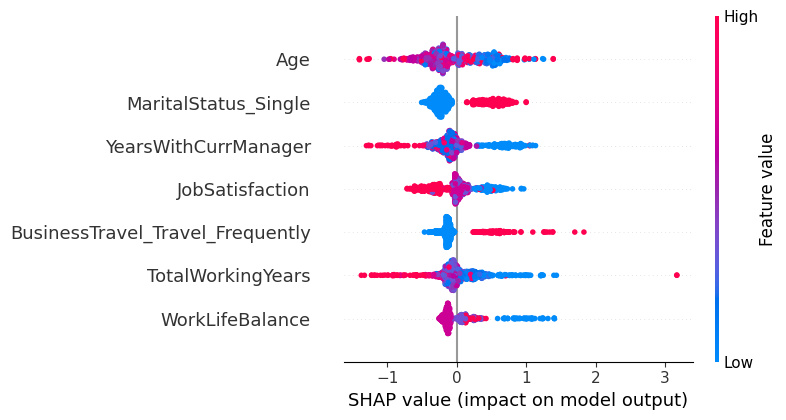

Skipping SHAP analysis for K-Nearest Neighbors (KNN is not compatible).


In [ ]:
# SHAP Analysis for Feature Importance with Column Names (to know which attribute is the most influential in the)
for name, model in models.items():
    # Skip KNN because it is not supported by SHAP
    if isinstance(model, KNeighborsClassifier):
        print(f"Skipping SHAP analysis for {name} (KNN is not compatible).")
        continue

    # Use TreeExplainer for tree-based models, else use Explainer
    if isinstance(model, (RandomForestClassifier, GradientBoostingClassifier, XGBClassifier)):
        # Use X_test_selected (which the model was trained on) for SHAP analysis
        explainer = shap.TreeExplainer(model)  # Pass X_train_selected here
        # Use X_test_selected (which the model was trained on) for SHAP analysis
        shap_values = explainer.shap_values(X_test_selected)  # Pass X_test_selected here
    else:
        # Use X_train_selected (which the model was trained on) for SHAP analysis
        explainer = shap.Explainer(model, X_train_selected)  # Pass X_train_selected here
        # Use X_test_selected (which the model was trained on) for SHAP analysis
        shap_values = explainer(X_test_selected)  # Pass X_test_selected here

    # SHAP Summary Plot
    print(f"SHAP Summary Plot for {name}")
    # Use X_test_selected (which the model was trained on) for SHAP analysis
    shap.summary_plot(shap_values, X_test_selected, feature_names=X_test_selected.columns)  # Pass X_test_selected here

### Key Observations

The SHAP summary plot highlights the most influential features driving attrition predictions and their impact on the model's decision-making. Key takeaways:

Marital Status (Single): Single employees have a higher likelihood of leaving, suggesting that personal commitments or financial stability may influence retention.
Age & Total Working Years: Younger employees and those with fewer years of work experience are more likely to leave, indicating career exploration or dissatisfaction with early job roles.
Years with Current Manager: Longer tenure with the same manager is associated with lower attrition, implying that strong leadership and stable management improve retention.
Job Satisfaction & Work-Life Balance: Lower satisfaction and poor work-life balance significantly increase the likelihood of attrition, emphasizing the importance of employee well-being.
Business Travel (Frequent Travelers): Employees who travel frequently for work show a higher risk of attrition, likely due to job-related stress, burnout, or lack of work-life balance.


### Improving the model according to SHAP

The SHAP summary plots clearly show that the features at the top with wide SHAP value spreads have the greatest impact on attrition. These are the key variables that drive the model’s decisions.

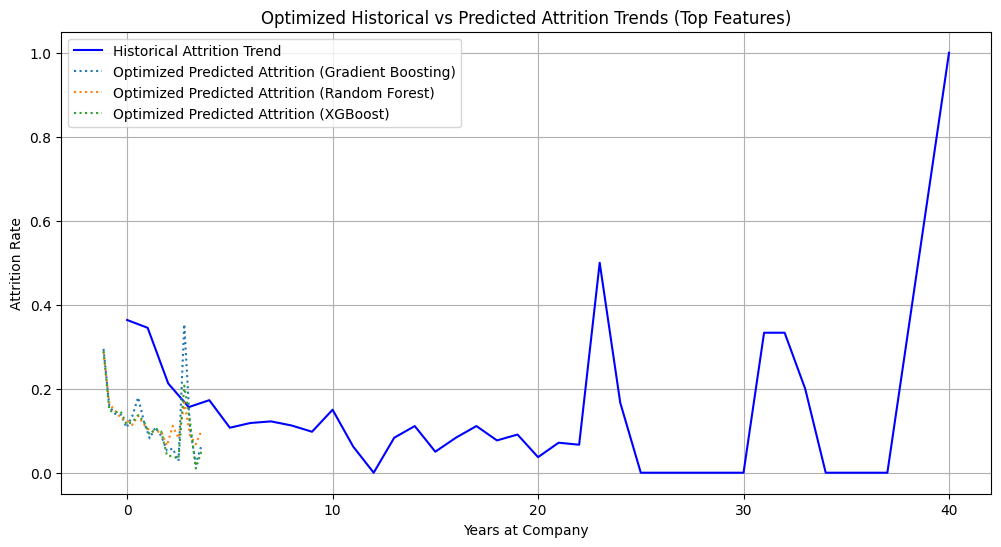

In [ ]:
# Ensure feature names exist before applying transformations
selected_features = [
    "MaritalStatus_Single", "Age", "TotalWorkingYears", "YearsWithCurrManager",
    "JobSatisfaction", "WorkLifeBalance", "BusinessTravel_Travel_Frequently"
]

# Extract features and target variable
X = merged_df[selected_features]
y = merged_df["Attrition"].astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Store feature names before scaling
feature_names = X_train.columns

# Standardize numerical features to improve model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame with column names
X_train_selected = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_selected = pd.DataFrame(X_test_scaled, columns=selected_features)


# Convert scaled data back to DataFrame with column names
X_train = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test = pd.DataFrame(X_test_scaled, columns=feature_names)

# Ensure selected features exist in X_train and X_test
X_train_selected = X_train[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

optimized_predictions = {}
for name, model in optimized_models.items():
    model.fit(X_train_selected, y_train)
    optimized_predictions[name] = model.predict_proba(X_test_selected)[:, 1]

# Store optimized predicted attrition per model
optimized_predicted_attrition = {}
for name, preds in optimized_predictions.items():
    predicted_df = pd.DataFrame({
        "YearsAtCompany": X_test_selected["YearsWithCurrManager"].values,
        "PredictedAttrition": preds
    })
    optimized_predicted_attrition[name] = predicted_df.groupby("YearsAtCompany")["PredictedAttrition"].mean()

# Plot historical vs optimized predicted attrition
plt.figure(figsize=(12, 6))
plt.plot(attrition_trend.index, attrition_trend, label="Historical Attrition Trend", color="blue")
for name, pred in optimized_predicted_attrition.items():
    plt.plot(pred.index, pred, label=f"Optimized Predicted Attrition ({name})", linestyle="dotted")
plt.xlabel("Years at Company")
plt.ylabel("Attrition Rate")
plt.title("Optimized Historical vs Predicted Attrition Trends (Top Features)")
plt.legend()
plt.grid(True)
plt.show()

#### Key Observations

Why SHAP Didn’t Change Predictions
The model’s predicted attrition trend remains the same because it was already using the most important features effectively. SHAP confirmed that Marital Status, Age, Total Working Years, Years with Current Manager, Job Satisfaction, Work-Life Balance, and Business Travel were driving predictions. Since these were already key in the original model, removing other features had little impact.

## K-Means Clustering

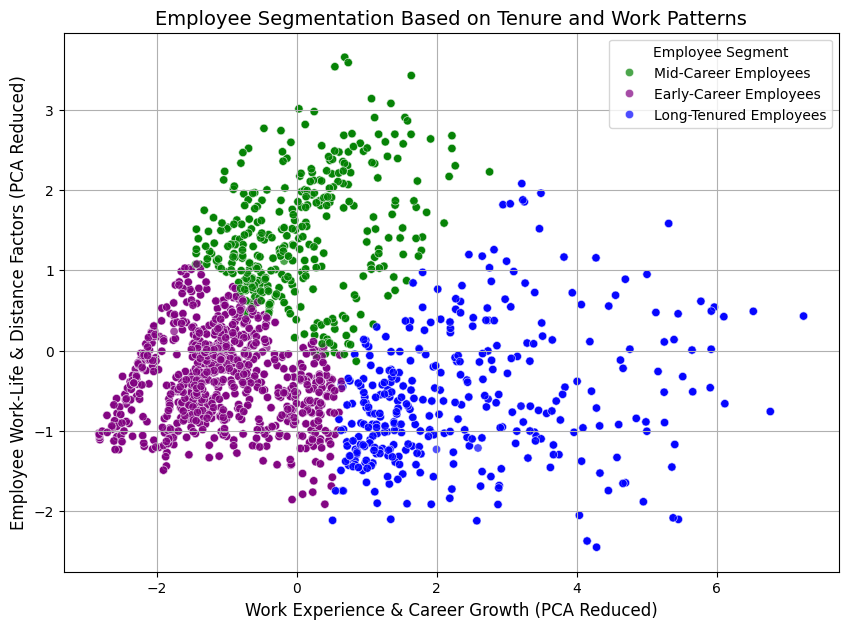

In [ ]:
# Define custom colors for clusters
custom_palette = ["green", "purple", "blue"]

# Clustering for Diversity Segmentation
cluster_features = ["Age", "DistanceFromHome", "TotalWorkingYears", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]
X_cluster = merged_df[cluster_features]
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
merged_df["Cluster"] = kmeans.fit_predict(X_cluster_scaled)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

# Map cluster numbers to meaningful labels
cluster_labels = {
    0: "Early-Career Employees",
    1: "Mid-Career Employees",
    2: "Long-Tenured Employees"
}
merged_df["Cluster Label"] = merged_df["Cluster"].map(cluster_labels)

# Create scatter plot with custom colors
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=merged_df["Cluster Label"], palette=custom_palette, alpha=0.7)

# Improve visualization
plt.title("Employee Segmentation Based on Tenure and Work Patterns", fontsize=14)
plt.xlabel("Work Experience & Career Growth (PCA Reduced)", fontsize=12)
plt.ylabel("Employee Work-Life & Distance Factors (PCA Reduced)", fontsize=12)
plt.legend(title="Employee Segment", fontsize=10)
plt.grid(True)

# Show plot
plt.show()


### Key Observations

This visualization segments employees based on career growth, work-life balance, and tenure using K-Means clustering. Employees on the left (purple) represent early-career employees with fewer promotions and a higher risk of attrition, requiring targeted retention efforts and career development opportunities. Mid-career employees (green, top) are in a transition phase, potentially seeking promotions or job changes, making mentorship and upskilling crucial for engagement. Long-tenured employees (blue, right) have gained stability and career growth but may need strategies to maintain motivation and leadership opportunities. The Y-axis reflects work-life balance and job stability factors, where employees higher up may have longer commutes or more recent promotions, while those lower down may experience job instability or better work-life balance. HR teams can use these insights to identify at-risk employees, promote fair career growth, and enhance retention strategies tailored to different career stages.

## Gender Attrition

<ipython-input-24-895a7d338fbf>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_attrition.index, y=gender_attrition["Attrition Rate"], palette="viridis")


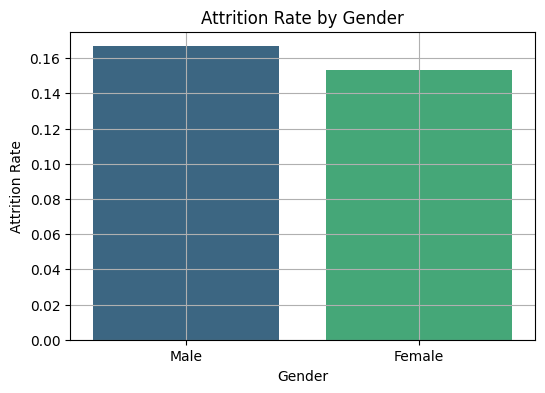

In [ ]:
# Create a new column for Female representation (since it was dropped as Gender_Male on One-Hot Encoding)
merged_df["Gender_Female"] = 1 - merged_df["Gender_Male"]

# Calculate attrition rate for both genders
gender_attrition = pd.DataFrame({
    "Male": merged_df.loc[merged_df["Gender_Male"] == 1, "Attrition"].mean(),
    "Female": merged_df.loc[merged_df["Gender_Male"] == 0, "Attrition"].mean()
}, index=["Attrition Rate"]).T  # Transpose for better visualization

# Plot gender-based attrition rates
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_attrition.index, y=gender_attrition["Attrition Rate"], palette="viridis")
plt.xlabel("Gender")
plt.ylabel("Attrition Rate")
plt.title("Attrition Rate by Gender")
plt.grid(True)
plt.show()


### Key Observation

The bar chart comparing attrition rates by gender reveals that male employees (16%) leave at a slightly higher rate than female employees (15%). While the difference is small, it may indicate underlying factors such as career mobility, job satisfaction, or workplace culture that influence turnover differently for men and women. Industry trends, work-life balance policies, or promotion opportunities could also play a role in this disparity. Although the gap is not significant, HR should explore these factors further to ensure that retention strategies, career growth opportunities, and workplace policies support both genders equally, promoting a more balanced and inclusive work environment.

## Gender VS Time in the Company



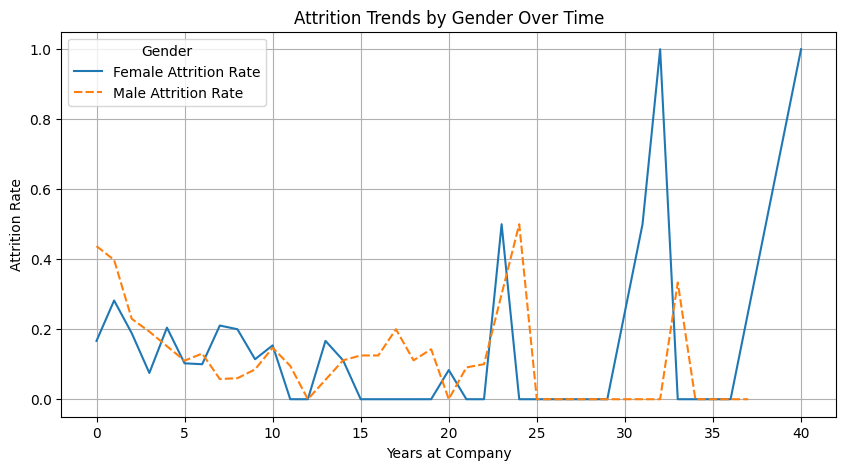

In [ ]:
# Ensure Gender_Female exists
merged_df["Gender_Female"] = 1 - merged_df["Gender_Male"]

# Group by YearsAtCompany and Gender, then calculate attrition rate
gender_trend = (
    merged_df.groupby(["YearsAtCompany", "Gender_Male"])["Attrition"]
    .mean()
    .unstack()  # Splits Male and Female into separate columns
)

# Rename columns for clarity
gender_trend.columns = ["Female Attrition Rate", "Male Attrition Rate"]

# Plot gender-based attrition trends over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=gender_trend)

# Formatting
plt.xlabel("Years at Company")
plt.ylabel("Attrition Rate")
plt.title("Attrition Trends by Gender Over Time")
plt.legend(title="Gender")
plt.grid(True)
plt.show()


### Key Observation

The graph shows that attrition rates for both males and females decline as tenure increases, with the highest attrition occurring in the early years of employment. Initially, male attrition (dashed orange line) is higher than female attrition (solid blue line), but over time, both genders exhibit fluctuations. Notably, there are sudden spikes in attrition beyond 20 years of tenure, particularly among females, suggesting instability or outliers in long-tenured employees. The overall trend indicates that attrition risk is highest in the early career phase and stabilizes over time, with occasional irregular spikes.

## Random Forest (Decision-based Model)

<ipython-input-26-32e7b7e00015>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")


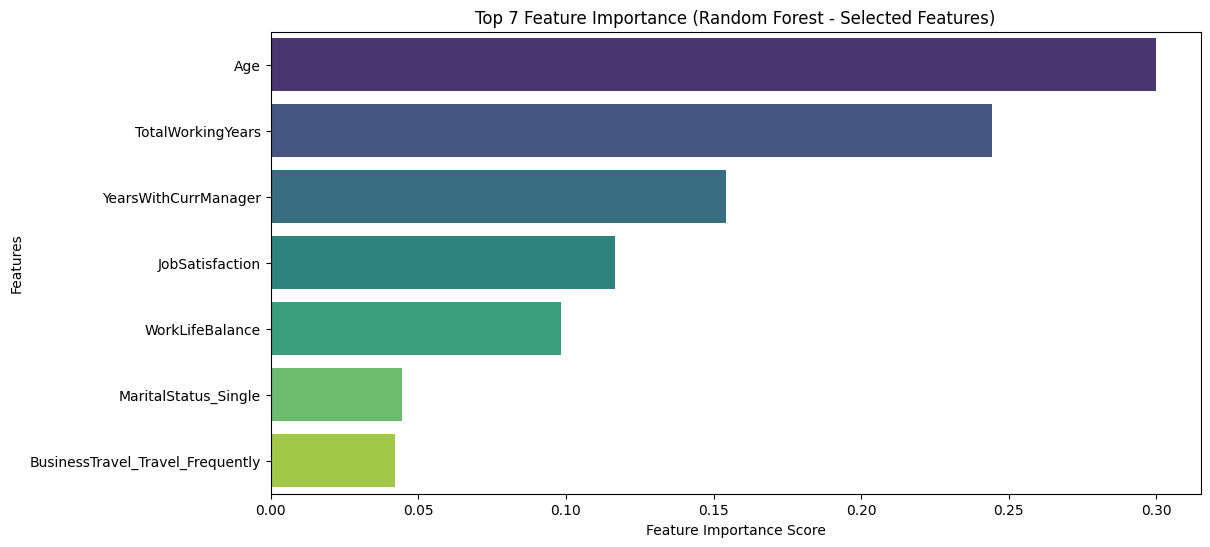

In [ ]:
# Decision-Based Model
# Which factors contribute the most to predicting attrition

# Retrain RandomForestClassifier on selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Compute feature importance correctly
importances = rf_selected.feature_importances_
feature_names = X_train_selected.columns  # Ensure correct feature names
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Filter and visualize top 10 features
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 7 Feature Importance (Random Forest - Selected Features)")
plt.show()


### Key Observations

The analysis reveals that age and monthly income are the strongest predictors of attrition, with younger, lower-paid employees being more likely to leave. Total working years and tenure also play a critical role, as early-career employees show higher attrition risk. Additionally, job satisfaction, environment satisfaction, and work-life balance significantly impact retention, emphasizing the need for a positive workplace culture. Salary hikes and commute distance further influence attrition, highlighting the importance of fair compensation and manageable travel times. To reduce attrition, organizations should focus on retaining younger, lower-paid employees, improving job satisfaction, offering competitive salary adjustments, and promoting flexible work policies.